<a href="https://colab.research.google.com/github/jun-wei-lin/NCHU/blob/main/Digital-Image-%20Processing/Hw3_%E9%9A%A8%E6%A9%9F%E9%9B%9C%E8%A8%8A/Hw3_%E9%9A%A8%E6%A9%9F%E9%9B%9C%E8%A8%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

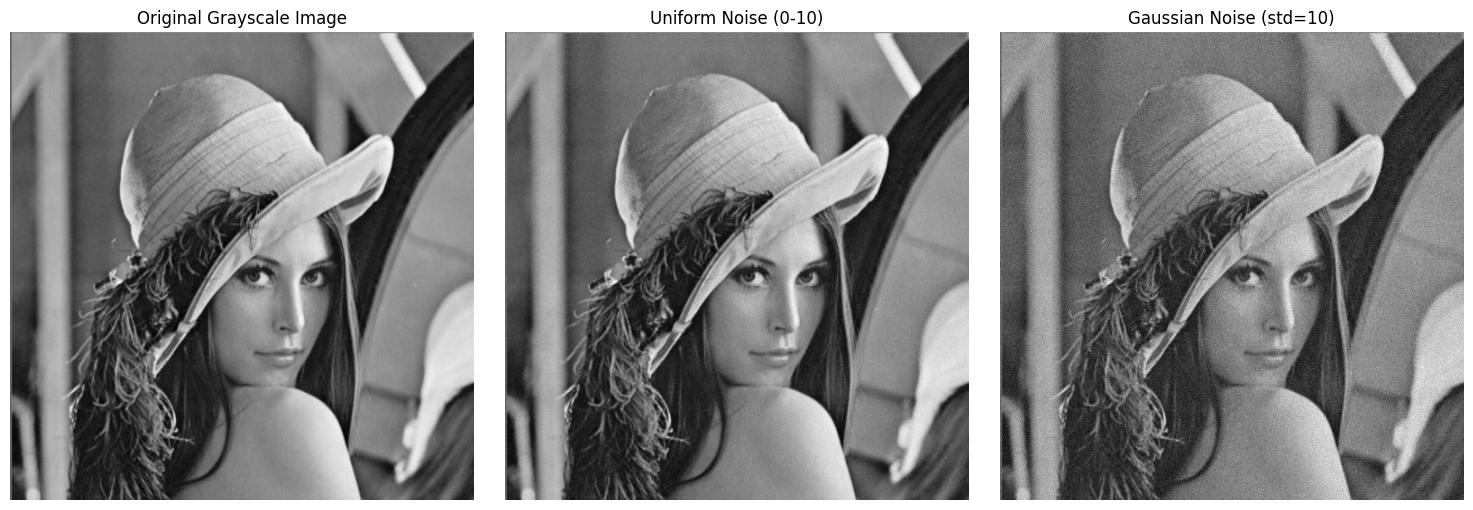

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlopen
from PIL import Image
import io

# 讀取影像
url = "https://raw.githubusercontent.com/nicktien007/Nick.NCHU.DIP/refs/heads/main/output/Unsharp_source_screenshot_01.01.2021.png"  # 替換成你的影像 URL

with urlopen(url) as response:
    image = np.array(Image.open(io.BytesIO(response.read())).convert('RGB'))

# 將影像轉換為灰階
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 加入均勻分佈的隨機雜訊 (範圍 0-10)
uniform_noise = np.random.randint(0, 11, gray_image.shape)
noisy_image_uniform = gray_image + uniform_noise
noisy_image_uniform = np.clip(noisy_image_uniform, 0, 255).astype(np.uint8)

# 加入高斯分佈的隨機雜訊 (均值 0, 標準差 10)
mean = 0
std_dev = 10
gaussian_noise = np.random.normal(mean, std_dev, gray_image.shape)
noisy_image_gaussian = gray_image + gaussian_noise
noisy_image_gaussian = np.clip(noisy_image_gaussian, 0, 255).astype(np.uint8)

# 顯示結果
plt.figure(figsize=(15, 5))

# 原始灰階影像
plt.subplot(1, 3, 1)
plt.title("Original Grayscale Image")
plt.imshow(gray_image, cmap="gray")
plt.axis("off")

# 加入均勻雜訊的影像
plt.subplot(1, 3, 2)
plt.title("Uniform Noise (0-10)")
plt.imshow(noisy_image_uniform, cmap="gray")
plt.axis("off")

# 加入高斯雜訊的影像
plt.subplot(1, 3, 3)
plt.title("Gaussian Noise (std=10)")
plt.imshow(noisy_image_gaussian, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()
